# 单层线性感知机实现
- 使用的是批处理方式，先算出每一个wi总的改变量，最后更新w。迭代更新w，当相隔10位的准确率的差小于0.01或者迭代次数达到要求时，结束迭代。计算结果大于等于0.5，输出是1；小于0.5，输出是0。两类是可以使用一根直线隔开的

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [2]:
#学习权重函数
def one_perceptron(input_x,input_y,C,test_x=None,max_round=60): 
    '''
    C是学习率,max_round是迭代次数
    当准确率的隔10位改变量小于0.01时，或者迭代次数大于max_round时，退出循环，输出w和准确率
    当测试集不是None时，输出预测值
    
    '''
    assert len(input_x)==len(input_y)
    w=np.random.rand(1,3).ravel()#初始化权重w,展平数据
    input_x=np.c_[input_x,np.ones(len(input_x))]#增加x0=1
    pred_y=np.dot(w,input_x.T)#计算预测值
    max_r=0
    acc_change=1
    acc=[]
    while (abs(acc_change)>0.01)&(max_r<max_round):
        input_y_pred=C*(input_y-pred_y)#差值乘以学习率
        
        #计算权重应该修改的量
        C_y_pred=input_y_pred.reshape(-1,1)
        change_w=(input_x*C_y_pred).sum(axis=0)
        w=w+change_w
        
        #迭代的准确率
        pred_y=np.dot(w,input_x.T)
        predict_y_int=[1 if i>=0.5 else 0 for i in pred_y ]#大于等于0.5等于1，小于0.5等于0
        acc.append(accuracy_score(input_y,predict_y_int))
        if max_r>10:
            acc_change=acc[max_r]-acc[max_r-10]#
        max_r+=1
    print('权重w的值：',w)
    print('准确率：{}%'.format(100*acc[max_r-1]))
    if test_x is not None:
        test_x=np.c_[test_x,np.ones(len(test_x))]#增加x0=1
        pred_test_y=np.dot(w,test_x.T)
        
        pred_test_y=[1 if i>=0.5 else 0 for i in pred_test_y]#大于等于0.5等于1，小于0.5等于0
        print('预测值：',pred_test_y)
        return w,acc[max_r-1],pred_test_y
    return w,acc[max_r-1]

## 设置的输入数据和测试集

In [3]:
input_x=np.array([[0,2],[-1,-2],[0,0],[1,0],[0,1],[6,1],[6,3],[1,6],[1,-6],[-1,-1]])
y=np.array([0,0,0,0,0,1,1,1,0,0])
test=np.array([[0,-1],[0,0.6],[1,10],[-6,1],[1,-1],[6,1]])

### 训练集不同类是可以使用一根直线隔开的，属于单层感知机线性可分问题

Text(0,0.5,'Y_input')

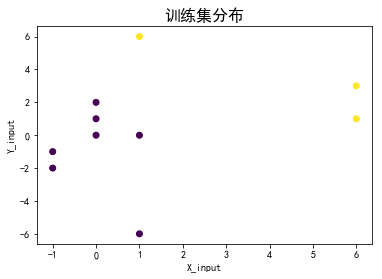

In [4]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(input_x[:,0],input_x[:,1],c=y)
ax.set_title('训练集分布',size=16)
ax.set_xlabel('X_input')
ax.set_ylabel('Y_input')

## 通过不断的迭代训练，w值基本不怎么改变了，可以看到预测结果基本正确

In [5]:
one_perceptron(input_x,y,0.01,test)

权重w的值： [ 0.14284657  0.06550683  0.02693114]
准确率：100.0%
预测值： [0, 0, 1, 0, 0, 1]


(array([ 0.14284657,  0.06550683,  0.02693114]), 1.0, [0, 0, 1, 0, 0, 1])